In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
import lineapy

In [2]:
full_data = pd.read_csv("ames_train_cleaned.csv")

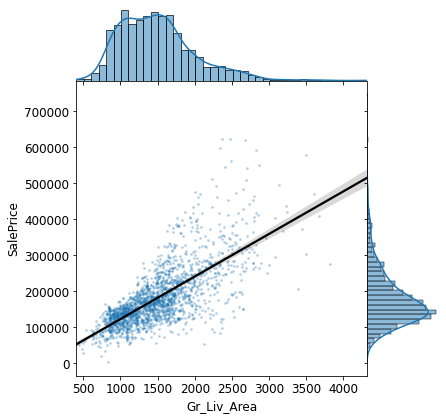

In [3]:
sns.jointplot(
    x='Gr_Liv_Area', 
    y='SalePrice', 
    data=full_data,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

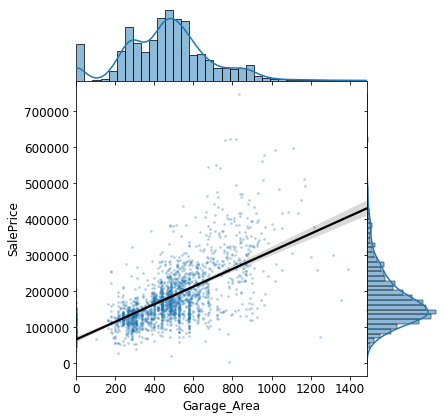

In [19]:
sns.jointplot(
    x='Garage_Area', 
    y='SalePrice', 
    data=full_data,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
);

In [20]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    return data.loc[(data[variable] > lower) & (data[variable] < upper), :]

In [21]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    """Process the data for a guided model."""
    data = remove_outliers(data, 'Gr_Liv_Area', upper=5000)
    
    # Transform Data, Select Features
    data = select_columns(data, 
                          'SalePrice', 
                          'Gr_Liv_Area', 
                          'Garage_Area',
                         )
    
    # Return predictors and response variables separately
    X = data.drop(['SalePrice'], axis = 1)
    y = data.loc[:, 'SalePrice']
    
    return X, y

In [22]:
train, val = train_test_split(full_data, test_size=0.3, random_state=42)
X_train, y_train = process_data_gm(train)
X_val, y_val = process_data_gm(val)

In [23]:
linear_model = lm.LinearRegression(fit_intercept=True)

In [24]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_val)

In [25]:
X_val["Predicted Sales Price"] = y_predicted
X_val['Neighborhood'] = val['Neighborhood']

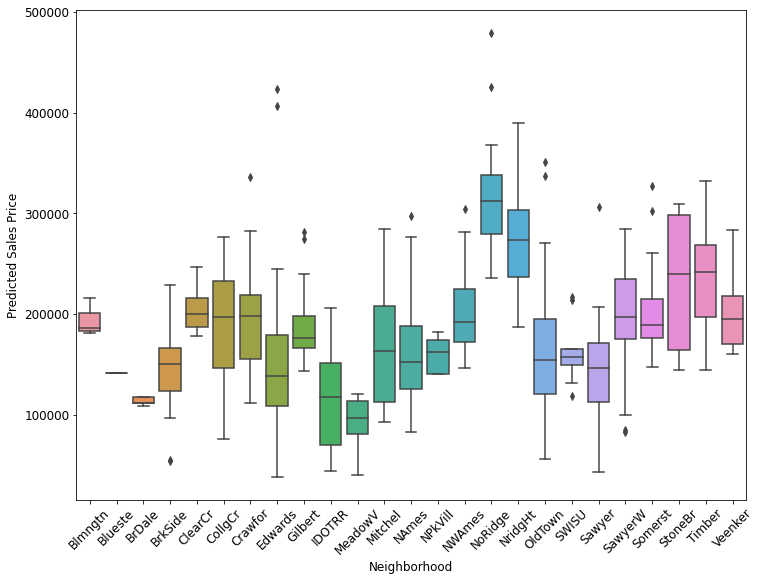

In [26]:
plot = sns.boxplot(
    x='Neighborhood',
    y='Predicted Sales Price',
    data=X_val.sort_values('Neighborhood'),
)

_ = plt.xticks(rotation=45)

In [27]:
lineapy.save(plot, name="Predict Price vs. Neighborhood", project="HousingPrice")

Artifact [Predict Price vs. Neighborhood] saved to Project [HousingPrice].


In [28]:
lineapy.save(linear_model, name="Sales price model", project="HousingPrice")

Artifact [Sales price model] saved to Project [HousingPrice].
